In [1]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
from hdf5storage import loadmat,savemat
import pandas as pd

In [2]:
def myimshow(data, title=None, cmap='RdYlBu', vmin=-2, vmax=2):
    plt.figure(figsize=(8, 6), layout='tight')
    plt.imshow(data, cmap=cmap, vmin =vmin, vmax=vmax)
    plt.colorbar(location='bottom')
    plt.yticks(np.arange(data.shape[0]),labels=[r'$\delta$',r'$\theta$',r'$\alpha$',r'$\mu$',r'$\beta_1$',r'$\beta_2$',r'$\gamma$'])
    if title is not None:
        plt.title(title)
    plt.show()

In [3]:
rng = random.default_rng(1234)


load networkx measurement outputs

In [4]:
outdict=loadmat('cc3_syn.mat')
cc3_syn=outdict['cc3_syn'] # 3nx x 2 syn x 4 condi x36 tr x 7 freq x 32 chan
# 3nx means 3 different networkx measurements; 2syn means 2 task types (synch and synco); 4 condi means 4 conditions; 

In [5]:
#degree centrality -dc efficiency -ef betweenness centrality -bc
#36 tr means 36 trials; 7 freq means 7 frequency bands; 32 chan means 32 channels
tasks = ['synch','synco']
feedback = ['ind','lead','follow','mutual']
dc = np.zeros((2*4*36,7,32))
ef = np.zeros((2*4*36,7,32))
bc = np.zeros((2*4*36,7,32))
t = np.array(np.zeros((2*4*36)),dtype = 'str')
f = np.array(np.zeros((2*4*36)),dtype = 'str')

for j in range(2):
    dc2 = np.zeros((4*36,7,32))
    ef2 = np.zeros((4*36,7,32))
    bc2 = np.zeros((4*36,7,32)) 
    f2 = np.array(np.zeros(4*36),dtype='str')
    for k in range(4):
        dc2[k*36:(k+1)*36,:,:]= cc3_syn[0,j,k,:,:,:]
        ef2[k*36:(k+1)*36,:,:]= cc3_syn[1,j,k,:,:,:]
        bc2[k*36:(k+1)*36,:,:]= cc3_syn[2,j,k,:,:,:]
        f2[k*36:(k+1)*36] = feedback[k]
    dc[j*4*36:(j+1)*4*36,:,:] = dc2
    ef[j*4*36:(j+1)*4*36,:,:] = ef2
    bc[j*4*36:(j+1)*4*36,:,:] = bc2
    f[j*4*36:(j+1)*4*36] = f2
    t[j*4*36:(j+1)*4*36] = tasks[j]

#Lets consider instead the way we did it in the first draft of the paper where we creare a null distribution and z-score the data. 
nsims = 20000
x = rng.choice(288,size = (36,nsims),replace = True)
#degree centrality
datax = np.zeros((nsims,7,32))
for j in range(nsims):
    datax[j,:,:] = np.mean(dc[x[:,j],:,:],axis  = 0)
dxmean = np.mean(datax,axis=0)
dxstd = np.std(datax,axis=0)
dataz = np.zeros((288,7,32))
dcsynch = dict()
#Degree centrality 
for k in range(4):

    dataz= np.mean(dc[(t == 'synch') & ((f == feedback[k])),:,:],axis =0)
    dataz = (dataz - dxmean)/dxstd
    dcsynch[feedback[k]] = dataz

dcsynco = dict()
for k in range(4):

    dataz= np.mean(dc[(t == 'synco') & ((f == feedback[k])),:,:],axis =0)
    dataz = (dataz - dxmean)/dxstd
    dcsynco[feedback[k]] = dataz

dctask = dict()
for j in range(2):
    dataz= np.mean(dc[(t == tasks[j])],axis =0)
    dataz = (dataz - dxmean)/dxstd
    dctask[tasks[j]] = dataz
dcfeed = dict()
for k in range(4):
    dataz= np.mean(dc[(f == feedback[k])],axis =0)
    dataz = (dataz - dxmean)/dxstd
    dcfeed[feedback[k]] = dataz

#efficiency   
datax = np.zeros((nsims,7,32))
for j in range(nsims):
    datax[j,:,:] = np.mean(ef[x[:,j],:,:],axis  = 0)
dxmean = np.mean(datax,axis=0)
dxstd = np.std(datax,axis=0)
dataz = np.zeros((288,7,32))
efsynch = dict()

for k in range(4):

    dataz= np.mean(ef[(t == 'synch') & ((f == feedback[k])),:,:],axis =0)
    dataz = (dataz - dxmean)/dxstd
    efsynch[feedback[k]] = dataz

efsynco = dict()
for k in range(4):

    dataz= np.mean(ef[(t == 'synco') & ((f == feedback[k])),:,:],axis =0)
    dataz = (dataz - dxmean)/dxstd
    efsynco[feedback[k]] = dataz

eftask = dict()
for j in range(2):
    dataz= np.mean(ef[(t == tasks[j])],axis =0)
    dataz = (dataz - dxmean)/dxstd
    eftask[tasks[j]] = dataz
effeed = dict()
for k in range(4):
    dataz= np.mean(ef[(f == feedback[k])],axis =0)
    dataz = (dataz - dxmean)/dxstd
    effeed[feedback[k]] = dataz

#betweenness centrality   
datax = np.zeros((nsims,7,32))
for j in range(nsims):
    datax[j,:,:] = np.mean(bc[x[:,j],:,:],axis  = 0)
dxmean = np.mean(datax,axis=0)
dxstd = np.std(datax,axis=0)
dataz = np.zeros((288,7,32))
bcsynch = dict()

for k in range(4):

    dataz= np.mean(bc[(t == 'synch') & ((f == feedback[k])),:,:],axis =0)
    dataz = (dataz - dxmean)/dxstd
    bcsynch[feedback[k]] = dataz

bcsynco = dict()
for k in range(4):

    dataz= np.mean(bc[(t == 'synco') & ((f == feedback[k])),:,:],axis =0)
    dataz = (dataz - dxmean)/dxstd
    bcsynco[feedback[k]] = dataz

bctask = dict()
for j in range(2):
    dataz= np.mean(bc[(t == tasks[j])],axis =0)
    dataz = (dataz - dxmean)/dxstd
    bctask[tasks[j]] = dataz
bcfeed = dict()
for k in range(4):
    dataz= np.mean(bc[(f == feedback[k])],axis =0)
    dataz = (dataz - dxmean)/dxstd
    bcfeed[feedback[k]] = dataz
         

DEGREE CENTRALITY

Compare tasks average over feedback.  There is nothing significant here.  

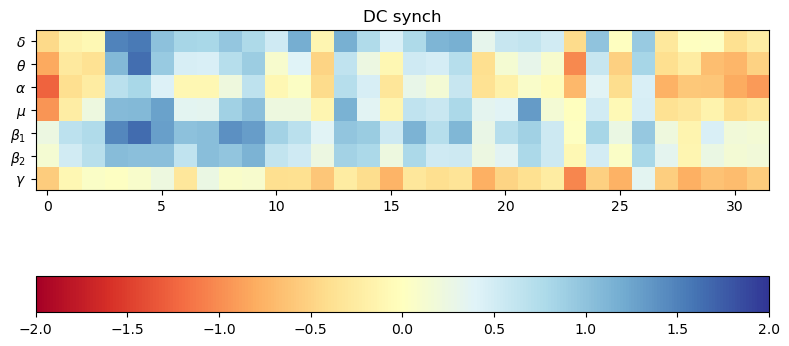

(array([], dtype=int64), array([], dtype=int64))


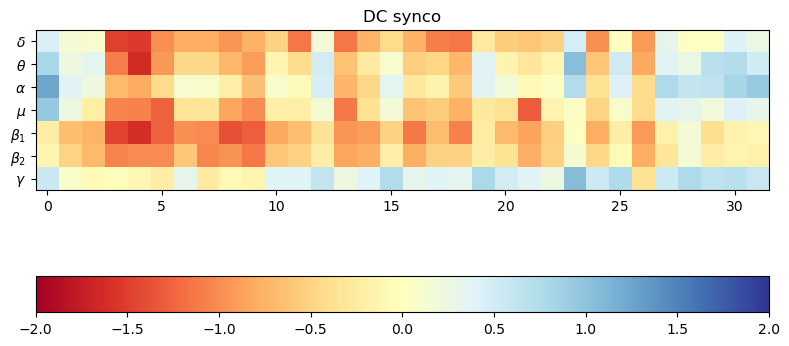

(array([], dtype=int64), array([], dtype=int64))


In [6]:
for j in range(2): 
    myimshow(dctask[tasks[j]],title = 'DC ' + tasks[j])
    print(np.where(np.abs(dctask[tasks[j]]) > 1.96))
    

Compare feedback averaged over tasks.  There is nothing significant here

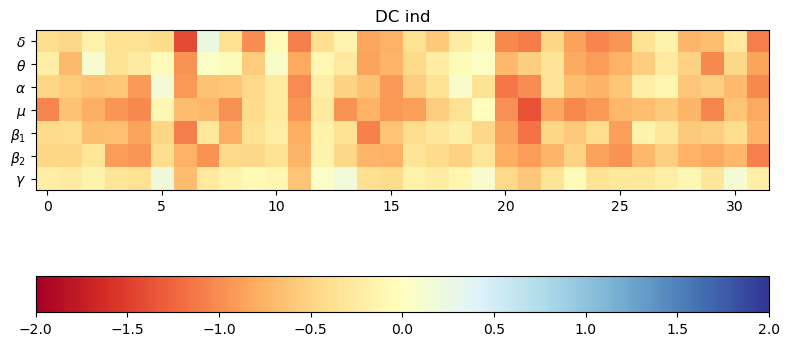

(array([], dtype=int64), array([], dtype=int64))


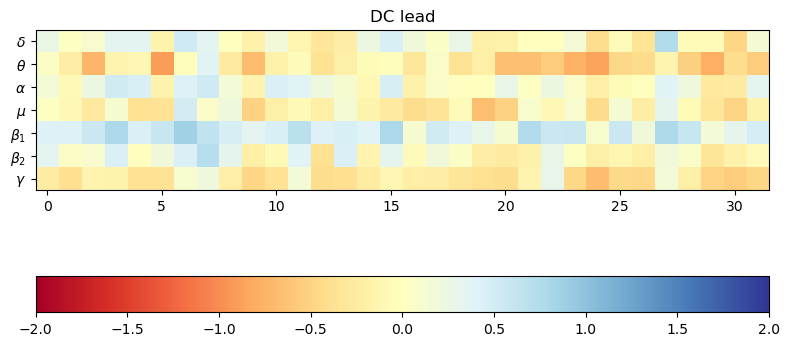

(array([], dtype=int64), array([], dtype=int64))


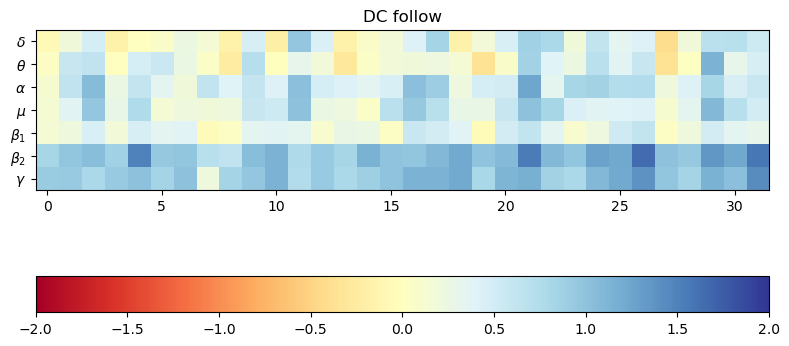

(array([], dtype=int64), array([], dtype=int64))


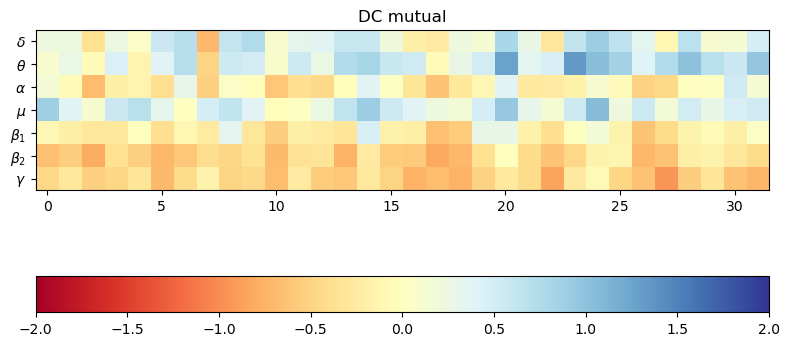

(array([], dtype=int64), array([], dtype=int64))


In [7]:
for k in range(4): 
    myimshow(dcfeed[feedback[k]],title = 'DC ' + feedback[k])
    print(np.where(np.abs(dcfeed[feedback[k]]) > 1.96))

The above results are not significant because the change in connectivity (degree centrality) depends on feedback in a different way for each task. 
Here we look at it separately for each feedback separately for tasks.  There are numerous significant effects. 

I take position that with 32 electrodes and 7 frequency bands, i should see > 224*0.05 effects to take it seriously. 

In synchronization, the connectivity is modulated in leader and follower.  Leader primary enhanced connectivity in gamma.  Follower shows reduced connectivity primarily in beta_2 and gamma but also other bands.  .\

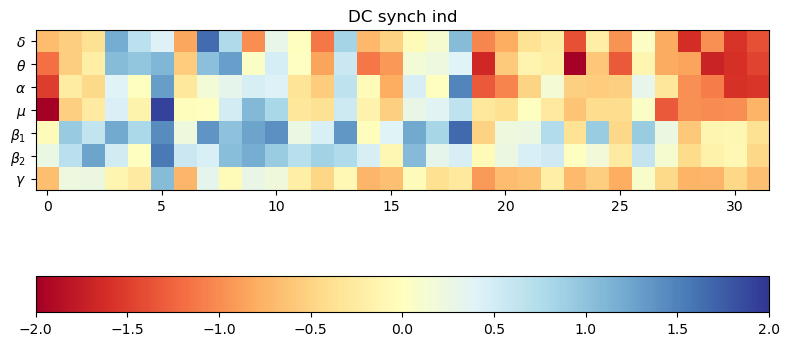

(array([1, 3]), array([23,  0]))


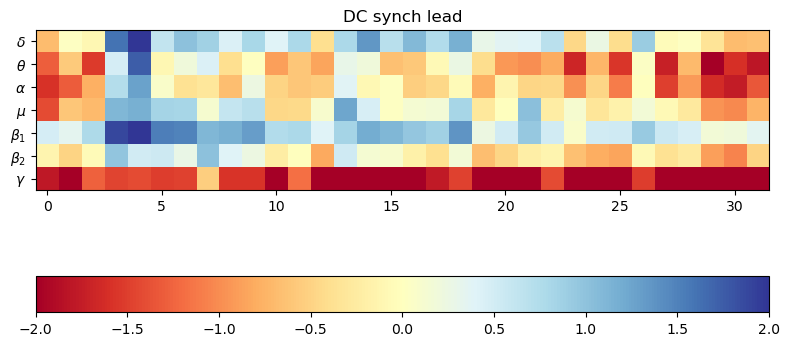

(array([0, 1, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]), array([ 4, 29,  4,  1, 10, 12, 13, 14, 15, 16, 19, 20, 21, 23, 24, 25, 27,
       28, 29, 30, 31]))


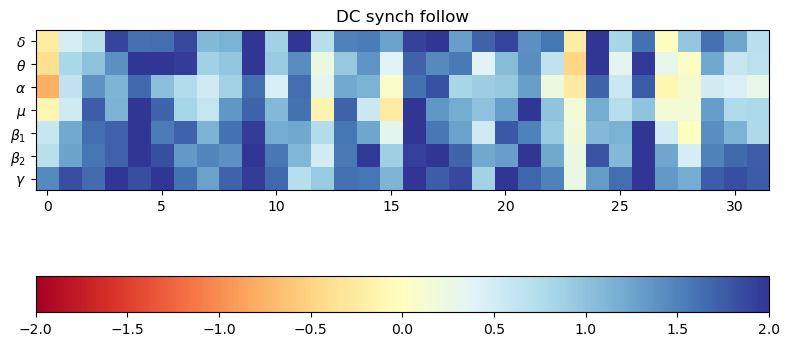

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6]), array([ 9, 11, 17, 24,  4,  5,  9, 24, 26,  4, 16, 21,  4, 16, 26,  4,  9,
       14, 17, 21, 26,  3,  5, 16, 20, 26]))


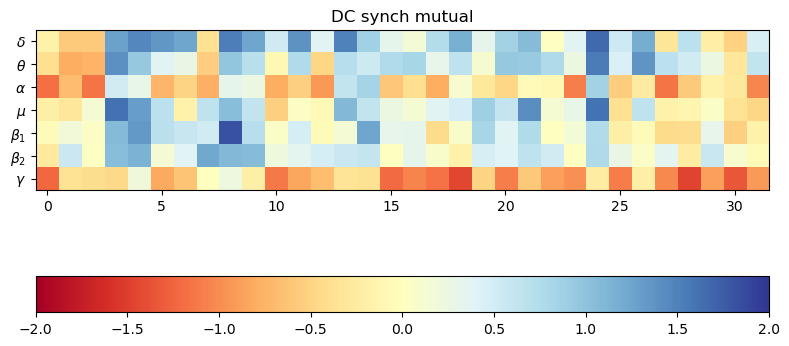

(array([], dtype=int64), array([], dtype=int64))


In [8]:
for k in range(4):
    myimshow(dcsynch[feedback[k]], title  = 'DC synch ' + feedback[k])
    print(np.where(np.abs(dcsynch[feedback[k]]) > 1.96))

beta1 and beta2 just for individual syncopation
mutual beta2 weaker same pattern


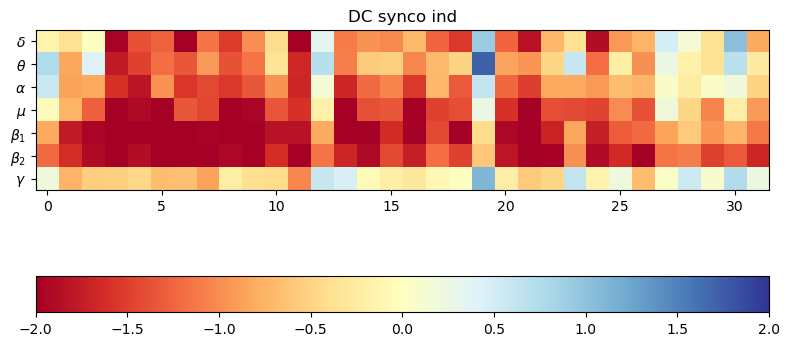

(array([0, 0, 0, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5]), array([ 3,  6, 11,  3,  5,  8, 13, 16, 21,  3,  4,  5,  6,  7,  8,  9, 13,
       14, 16, 18, 21,  3,  5,  6,  7,  9, 11, 21, 22, 26]))


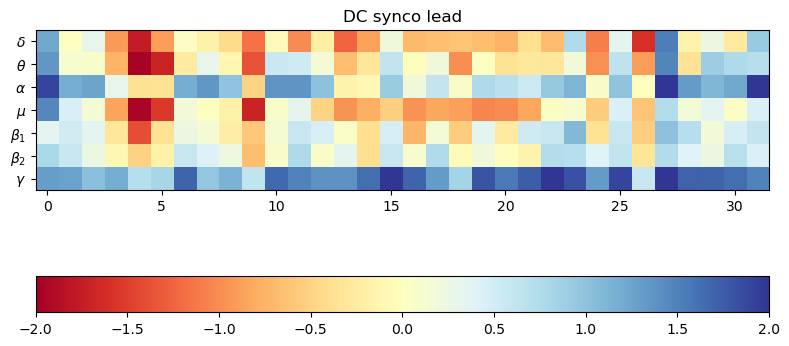

(array([1, 2, 2, 6, 6, 6]), array([ 4, 27, 31, 15, 22, 27]))


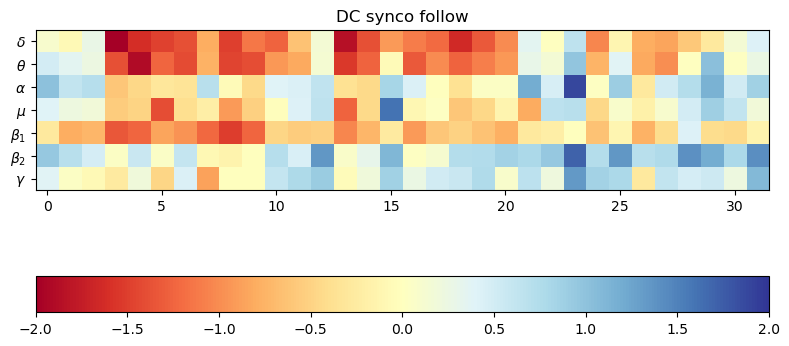

(array([0]), array([3]))


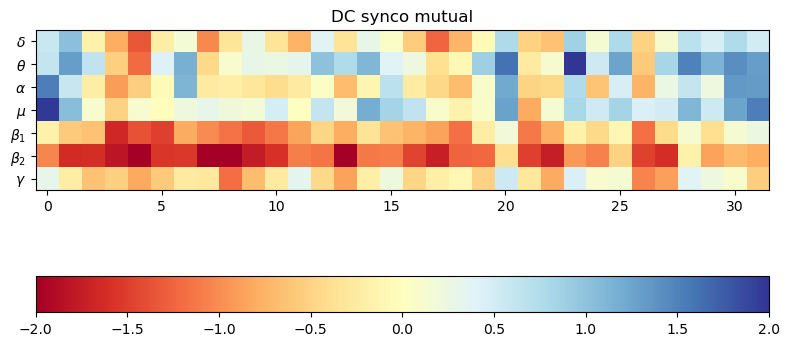

(array([1, 3, 5, 5, 5, 5]), array([23,  0,  4,  7,  8, 13]))


In [9]:
for k in range(4):
    myimshow(dcsynco[feedback[k]],title = 'DC synco ' + feedback[k])
    print(np.where(np.abs(dcsynco[feedback[k]]) > 1.96))

BETWEENNESS CENTRALITY

no main effect of task 

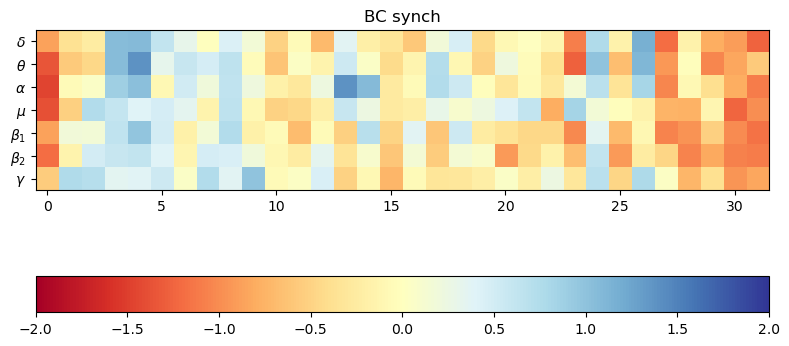

(array([], dtype=int64), array([], dtype=int64))


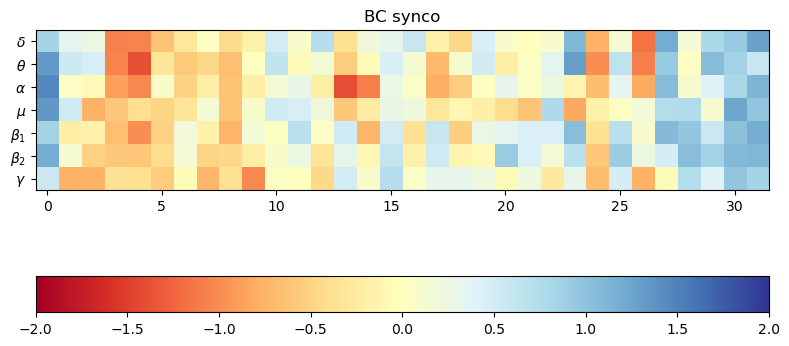

(array([], dtype=int64), array([], dtype=int64))


In [10]:
for j in range(2): 
    myimshow(bctask[tasks[j]],title = 'BC ' + tasks[j])
    print(np.where(np.abs(bctask[tasks[j]]) > 1.96))

no main effect of feedback

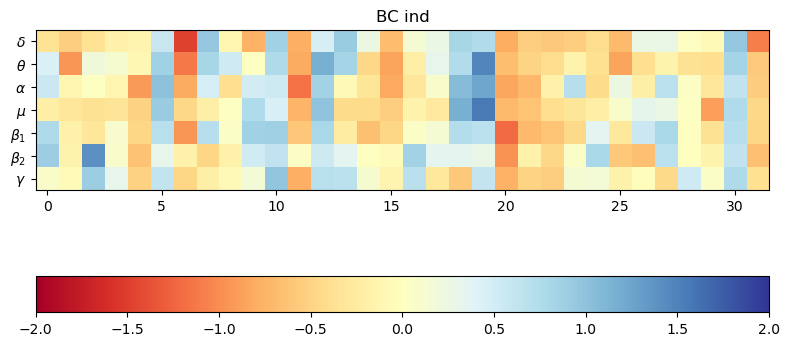

(array([], dtype=int64), array([], dtype=int64))


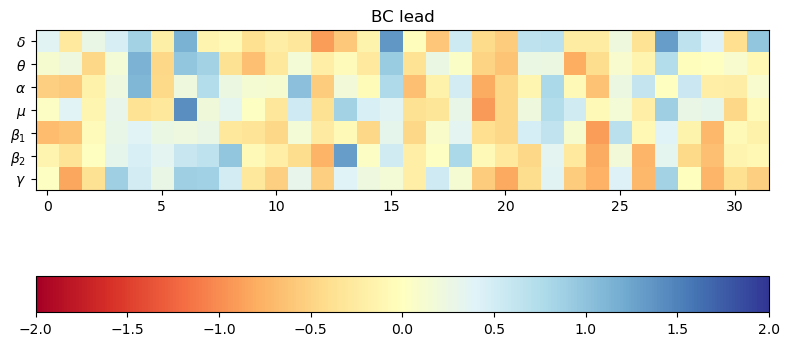

(array([], dtype=int64), array([], dtype=int64))


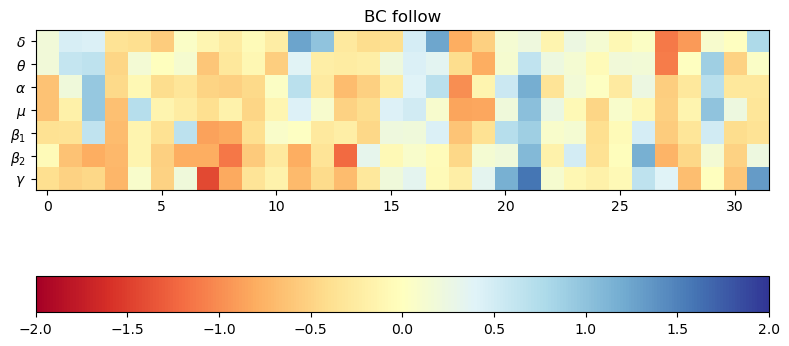

(array([], dtype=int64), array([], dtype=int64))


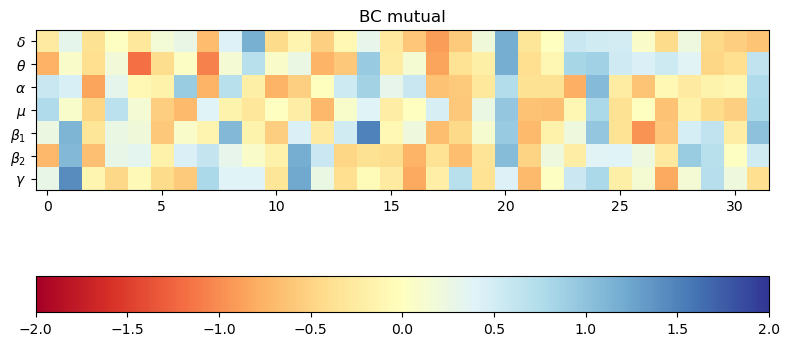

(array([], dtype=int64), array([], dtype=int64))


In [11]:
for k in range(4): 
    myimshow(bcfeed[feedback[k]],title = 'BC ' + feedback[k])
    print(np.where(np.abs(bcfeed[feedback[k]]) > 1.96))

There are task and feedback reorganization of connectivity patterns detected in BC.  

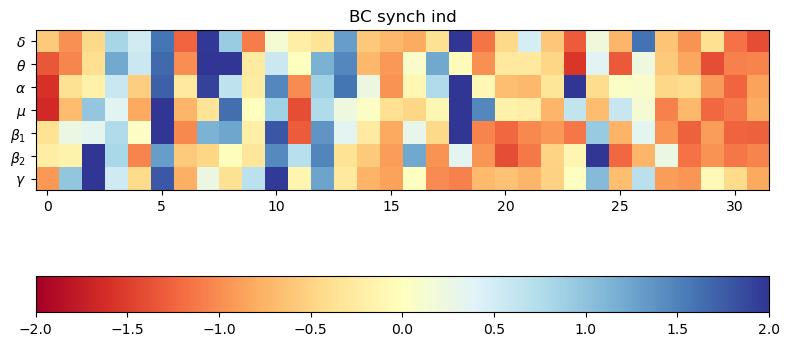

(array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]), array([ 7, 18,  7,  8, 18, 23,  5, 18,  5, 18,  2, 24,  2, 10]))


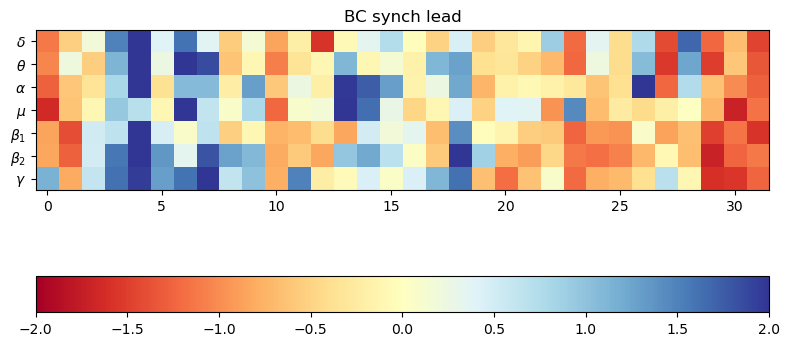

(array([0, 1, 1, 2, 2, 2, 3, 3, 4, 5, 5, 6]), array([ 4,  4,  6,  4, 13, 26,  6, 13,  4,  4, 18,  7]))


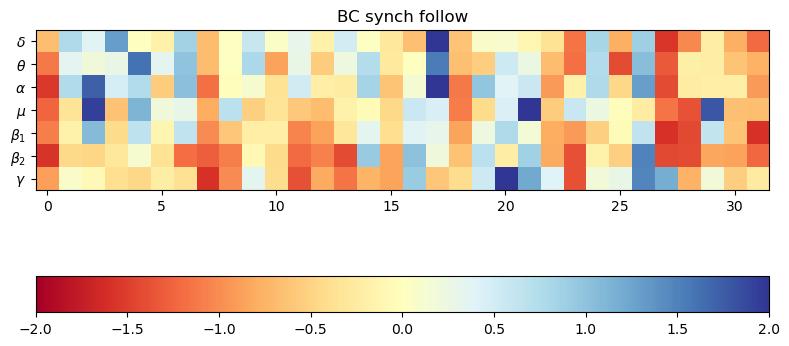

(array([0, 2, 3, 6]), array([17, 17, 21, 20]))


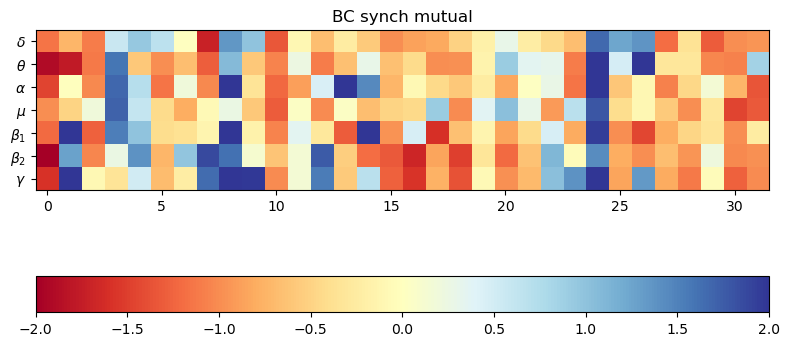

(array([1, 1, 2, 2, 2, 4, 4, 4, 5, 6, 6, 6, 6]), array([24, 26,  8, 13, 24,  1,  8, 14,  0,  1,  8,  9, 24]))


In [12]:
for k in range(4):
    myimshow(bcsynch[feedback[k]], title  = 'BC synch ' + feedback[k])
    print(np.where(np.abs(bcsynch[feedback[k]]) > 1.96))

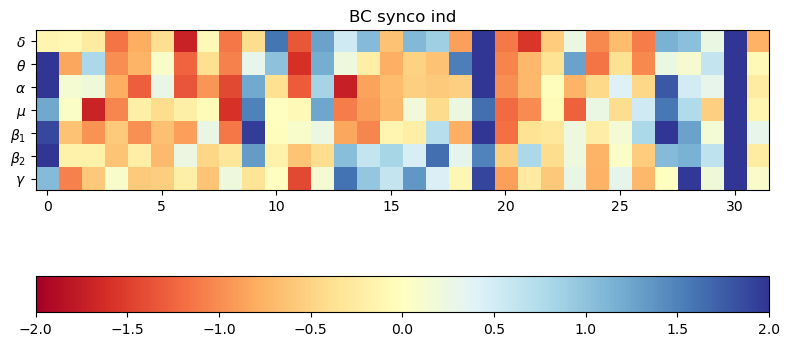

(array([0, 0, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 5, 5, 6, 6]), array([19, 30,  0, 19, 30,  0, 19, 30, 30, 19, 27, 30,  0, 30, 28, 30]))


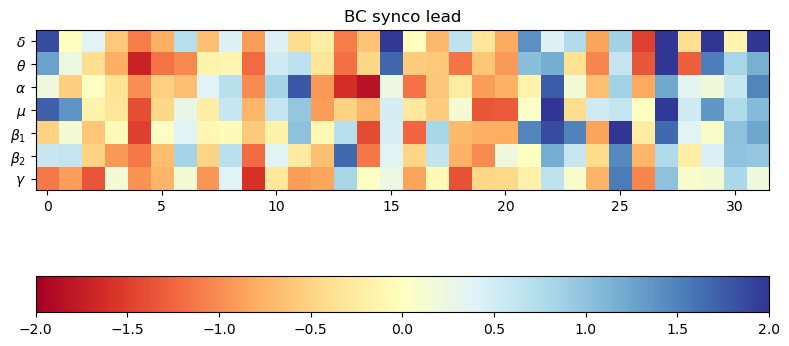

(array([0, 0, 0, 0, 1, 3, 3, 4]), array([15, 27, 29, 31, 27, 22, 27, 25]))


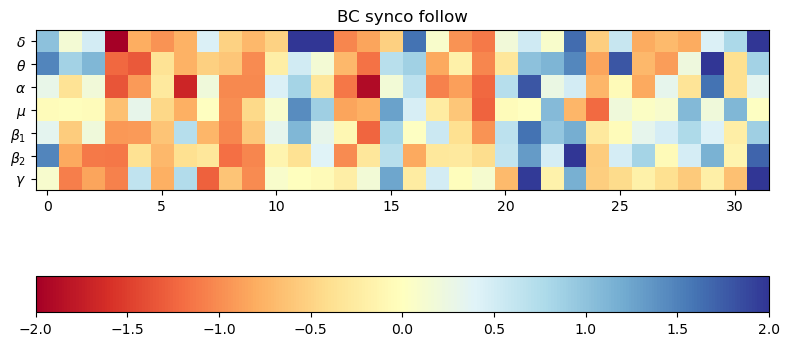

(array([0, 0, 0, 0, 1, 5, 6, 6]), array([ 3, 11, 12, 31, 29, 23, 21, 31]))


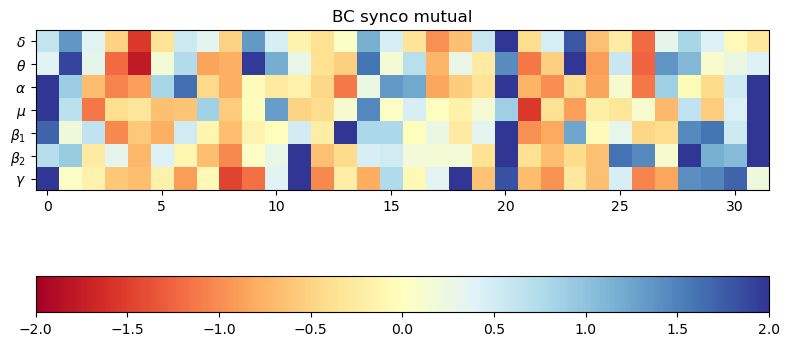

(array([0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6]), array([20,  9, 23,  0, 20, 31,  0, 31, 13, 20, 31, 11, 20, 28, 31,  0, 11,
       18]))


In [13]:
for k in range(4):
    myimshow(bcsynco[feedback[k]], title  = 'BC synco ' + feedback[k])
    print(np.where(np.abs(bcsynco[feedback[k]]) > 1.96))

The striking thing about explaining the BC results is that specific channels are modified across frequency bands. but which channels are modulated depends on feedback. 